In [1]:
path = r"C:\Users\saura\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv"

## step 1 : Import Required Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , cross_val_score,StratifiedKFold , GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics  import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve
import pickle

In [3]:
df = pd.read_csv(path)
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
pd.set_option("display.max_columns", None)

In [5]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# drop unneccesary columns 
df = df.drop(columns = 'customerID')

In [8]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# displaying the unique records in all the columns
numerical_features_list = ["tenure","MonthlyCharges","TotalCharges"]
for col in df.columns:
    if col not in numerical_features_list:
        print(col, df[col].unique())
        print("-" * 50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [10]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# df['TotalCharges'] = df['TotalCharges'].astype("float64")

In [12]:
df[df["TotalCharges"] == " "]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

In [13]:
len(df[df["TotalCharges"] == " "])

11

In [14]:
df['TotalCharges'] = df['TotalCharges'].replace({" ": "0.0"})

In [15]:
df['TotalCharges'] = df['TotalCharges'].astype("float64")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [17]:
# distribution of class distribution of target columns 
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


### Insights 
- CustomerId column is remove because not required for the building model
- no missing value in the dataset
- missing value in the total_charges were replaced by 0
- convert the total_charge column into float column which earlier object datatype
- class imbalance identified in churn columns

3. EDA

In [18]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

#### Numerical Features - Analysis
- understand the distribution of the numerical features

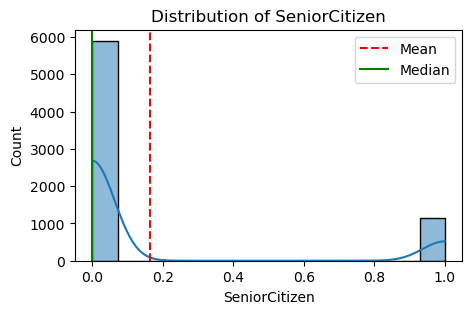

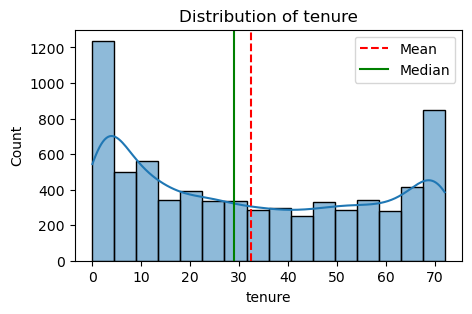

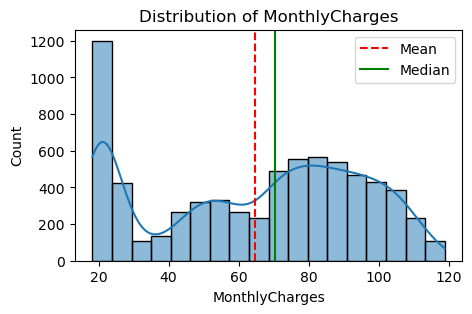

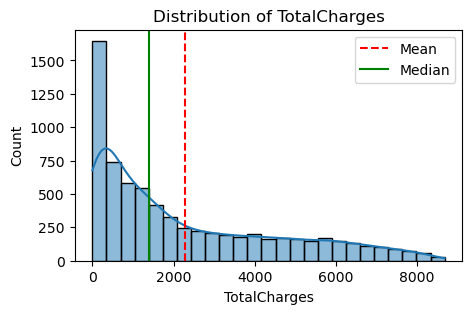

In [20]:
numeric_columns = df.select_dtypes(include = ['float64', 'int64'])
for col in numeric_columns.columns:
    plt.figure(figsize=(5,3))
    plt.title(f"Distribution of {col}")
    sns.histplot(df[col], kde = True)
    # calculate the mean and median values for the columns
    col_mean = df[col].mean()
    col_median = df[col].median()

    # add vertical line for mean and median
    plt.axvline(col_mean, color = 'red', linestyle="--", label = "Mean")
    plt.axvline(col_median, color = 'green', linestyle = "-", label = "Median")
    plt.legend()
    plt.show()

### Box flot for numerical features:


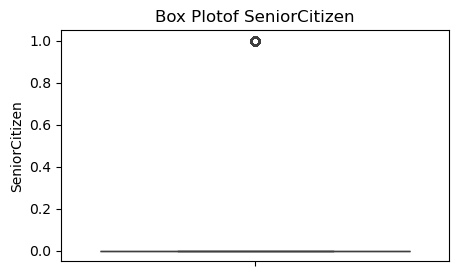

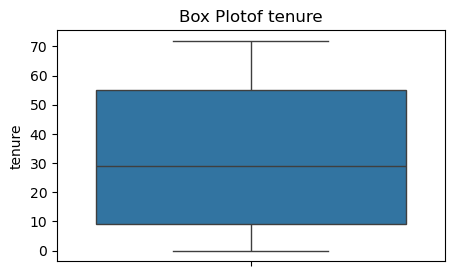

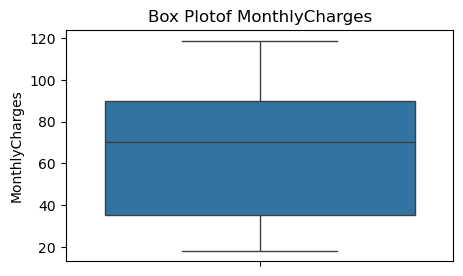

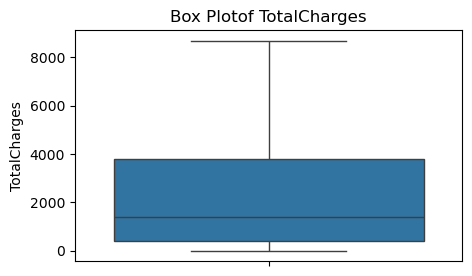

In [21]:
for col in numeric_columns.columns:
    plt.figure(figsize= (5,3))
    plt.title(f"Box Plotof {col}")
    sns.boxplot(df[col])
    plt.show()

#### Correlation Heatmap for numerical Columns

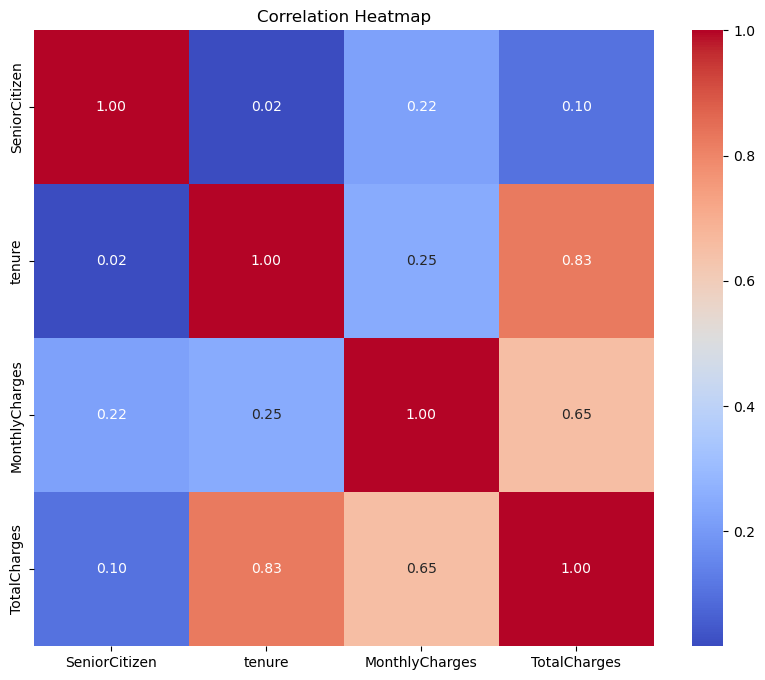

In [22]:
# correlation Heatmap
corr_matrix = numeric_columns.corr(method = "pearson")
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix , annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Categorical Features Analysis

In [23]:
categorical_columns = df.select_dtypes(include='object').columns.to_list()
categorical_columns = ['SeniorCitizen']   + categorical_columns


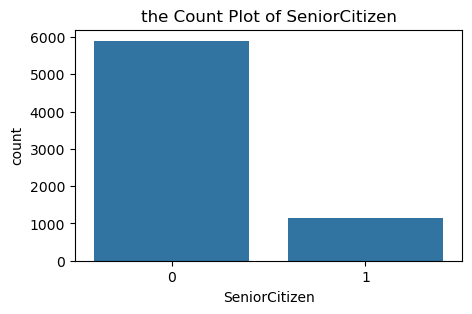

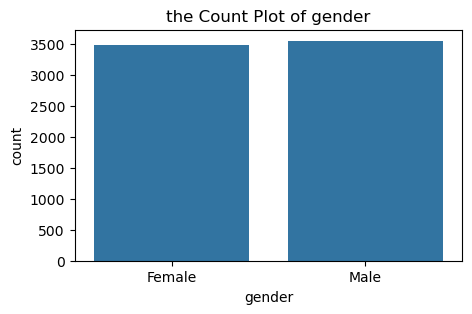

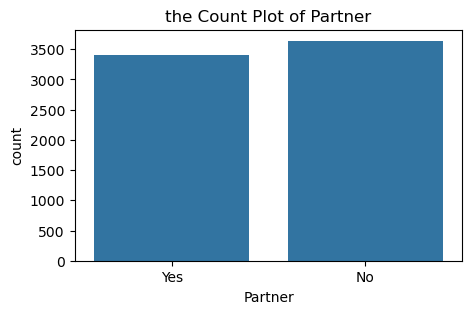

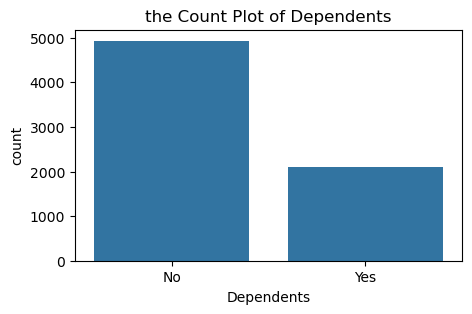

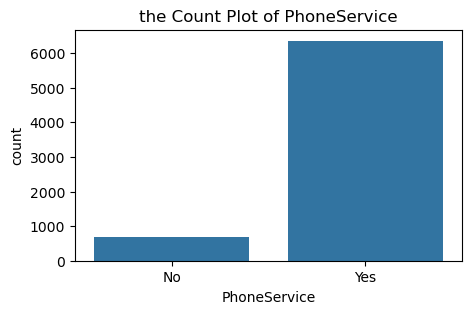

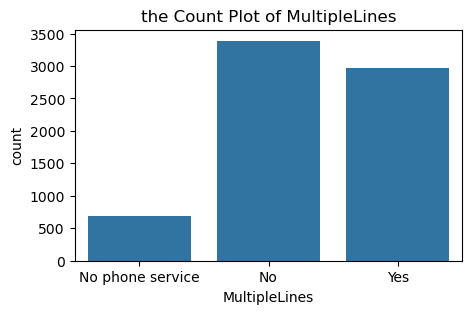

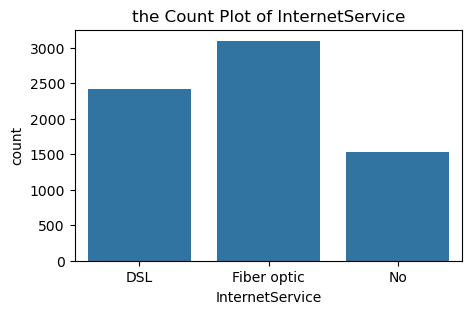

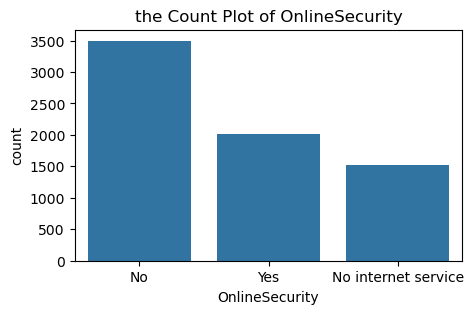

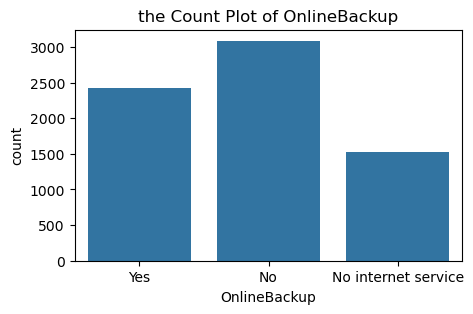

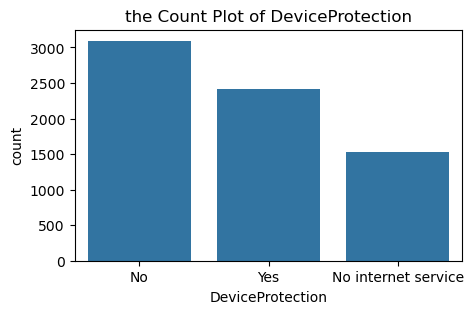

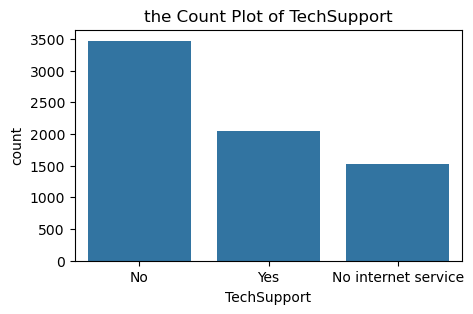

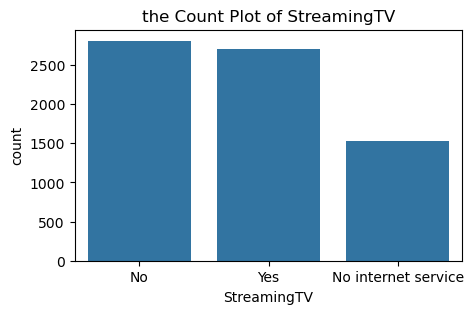

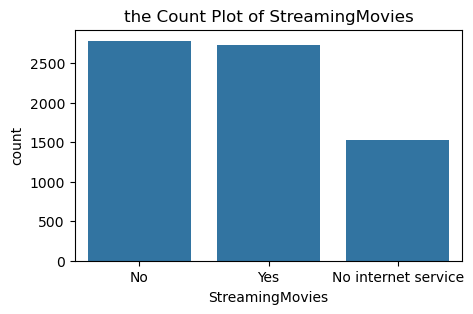

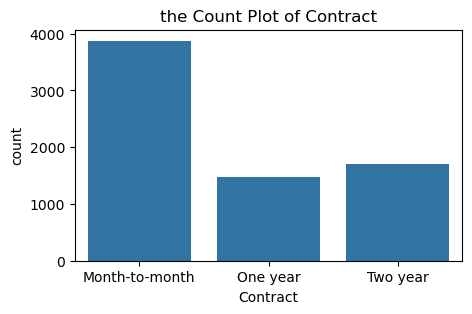

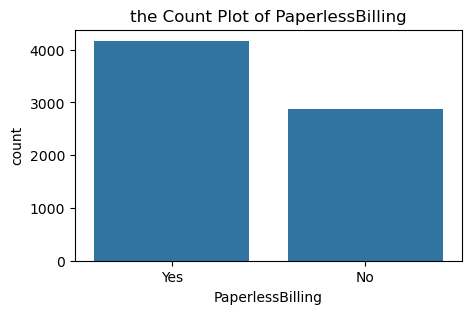

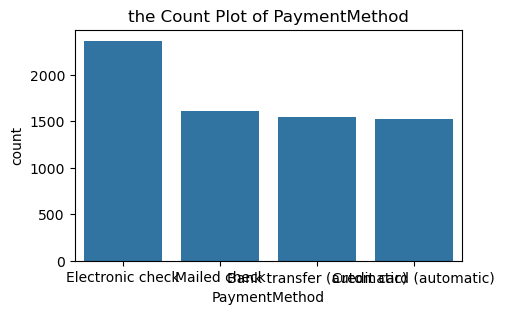

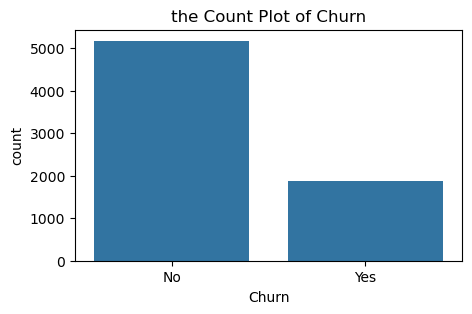

In [24]:
for col in categorical_columns:
    plt.figure(figsize=(5,3))
    sns.countplot(x = df[col])
    plt.title(f"the Count Plot of {col}")
    plt.show()
    

### Data Preprocessing

#### LabelEncoding for target columns

In [25]:
df['Churn'] = df['Churn'].replace({"Yes": 1, "No":0})

C:\Users\saura\AppData\Local\Temp\ipykernel_11420\2077454277.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({"Yes": 1, "No":0})


In [26]:
df.head(2)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0              Yes  Electronic check           29.85         29.85      0  
1               No      Mailed check           56.95       1889.50      0

In [27]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [28]:
# Labelencoding for the object columns
object_columns = df.select_dtypes(include = 'object').columns.to_list()


In [29]:
print(object_columns)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [30]:
## intialize the dictionary to save the encoders
encoders = {}
## apply the encoder and stoer the encoders
for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder
    
    # save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [31]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [32]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

### Training and Test Data Split

In [33]:
# splitting the features and target columns
X = df.drop(columns=['Churn'])
y = df['Churn']


In [34]:
X.head(1)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              2           29.85         29.85

In [35]:
# split training and test data
x_train, x_test, y_train, y_test, = train_test_split(X,y , test_size=0.2, stratify=y ,random_state=42)

In [36]:
print(y_train.shape)

(5634,)


In [37]:
print(y_train.value_counts())

Churn
0    4139
1    1495
Name: count, dtype: int64


#### Synthetic Minority Oversampling Technique(SMOTE)

In [38]:
smote  = SMOTE(random_state=42)

In [39]:
x_train_smote , y_train_smote = smote.fit_resample(x_train, y_train)

In [40]:
print(y_train_smote.shape)

(8278,)


In [41]:
print(y_train_smote.value_counts())

Churn
0    4139
1    4139
Name: count, dtype: int64


## 5. Model Training

In [42]:
## trainning with default hyperparameters 

In [43]:
# creating  a dictionary of models 
models = {
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "Random Forest" : RandomForestClassifier(random_state= 42),
    "XGBoost":XGBClassifier(random_state= 42)
}

In [44]:
# dictionary to stoe the cross validation results
cv_scores = {}
# perform 5 - fold  cross validation for each models
for model_name, model in models.items():
    print(f"Trainning {model_name} with default Parameters ")
    scores = cross_val_score(model, x_train_smote, y_train_smote, cv=5, scoring="f1")
    cv_scores[model_name] = scores
    print(f'{model_name} cross - validation accuracy : {np.mean(scores):.2f}')
    print("-" * 70)

Trainning Decision Tree with default Parameters 
Decision Tree cross - validation accuracy : 0.78
----------------------------------------------------------------------
Trainning Random Forest with default Parameters 
Random Forest cross - validation accuracy : 0.83
----------------------------------------------------------------------
Trainning XGBoost with default Parameters 
XGBoost cross - validation accuracy : 0.82
----------------------------------------------------------------------


In [45]:
cv_scores

{'Decision Tree': array([0.67711172, 0.68997361, 0.85842697, 0.84940778, 0.83943662]),
 'Random Forest': array([0.70414617, 0.73677069, 0.90939786, 0.89600899, 0.89538808]),
 'XGBoost': array([0.67440174, 0.70777856, 0.91387025, 0.89834254, 0.89732143])}

##### Random forest gives the highest accuracy compared to other models with default parameters

In [46]:
rfc = RandomForestClassifier(class_weight="balanced",random_state=42)

In [47]:
rfc.fit(x_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [48]:
print(y_test.value_counts())

Churn
0    1035
1     374
Name: count, dtype: int64


### 6. Model Evaluations 

In [49]:
# evaluate the test data
y_test_pred = rfc.predict(x_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classfication Report:\n", classification_report(y_test, y_test_pred))



Accuracy Score:
 0.7785663591199432
Confusion Matrix:
 [[880 155]
 [157 217]]
Classfication Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1035
           1       0.58      0.58      0.58       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [50]:
### Model tunning 
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 3],
    "class_weight": ["balanced", None]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid,
                    cv=5,
                    scoring='f1',
                    n_jobs=-1)

grid.fit(x_train_smote, y_train_smote)
print("Best F1 score:", grid.best_score_)
print("Best params:", grid.best_params_)

Best F1 score: 0.8337011419794917
Best params: {'class_weight': None, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [51]:

model = LGBMClassifier(class_weight='balanced', random_state=42)
model.fit(x_train_smote, y_train_smote)


[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(class_weight='balanced', random_state=42)

In [52]:
stack = StackingClassifier(
    estimators=[
        ("rf", RandomForestClassifier(random_state=42)),
        ("xgb", XGBClassifier(random_state=42)),
    ],
    final_estimator=LogisticRegression(),
    cv=5
)
stack.fit(x_train_smote, y_train_smote)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None,
                                              feature_weights=None, gamma=None,
                                              gro...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...))],
                   final_estimator=LogisticRegression())

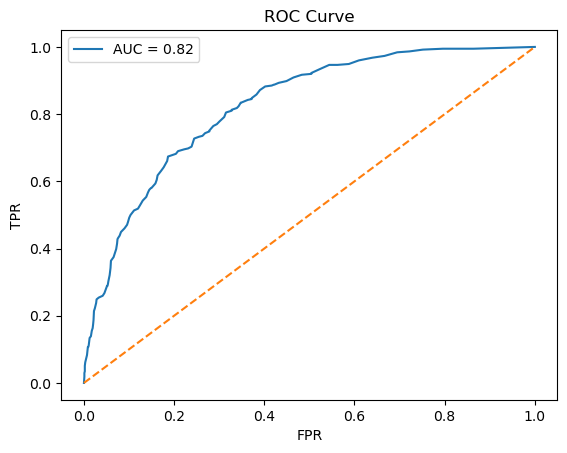

In [53]:
probs = rfc.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, probs)
auc_score = roc_auc_score(y_test, probs)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [54]:
# Use the best parameters from GridSearch
best_params = {
    'n_estimators': 100,
    'max_depth': 15,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'class_weight': None,
    'random_state': 42
}

# 1. Initialize model with best params
final_rf = RandomForestClassifier(**best_params)

# 2. Apply SMOTE on training data
sm = SMOTE(random_state=42)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

# 3. Train the model
final_rf.fit(x_train_smote, y_train_smote)

# 4. Predict on test set
y_pred = final_rf.predict(x_test)
y_prob = final_rf.predict_proba(x_test)[:, 1]

# 5. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Accuracy: 0.7757274662881476
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1035
           1       0.57      0.63      0.60       374

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409

Confusion Matrix:
 [[856 179]
 [137 237]]
ROC AUC Score: 0.8286122090469917


### 7. Load the Saved model and build a predictive System

In [55]:
# save the trained model as a pickle file
model_data = {"Model": rfc, "features_name" : X.columns.tolist()}
with open("Customer_churn_mode_new.pkl", "wb") as f:
    pickle.dump(model_data,f)

##### Load the saved model and build a predictive system

In [56]:
# load the saved model and the encoders
with open ("Customer_churn_mode_new.pkl", "rb") as f:
    model_data = pickle.load(f)
loaded = model_data['Model']
feature_names = model_data["features_name"]

In [57]:
print(loaded)

RandomForestClassifier(class_weight='balanced', random_state=42)


In [58]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [65]:
## testing the new data for models
new_data = {
    "customerID": "7590-VHVEG",
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 1,
    "PhoneService": "No",
    "MultipleLines": "No phone service",
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 29.85,
    "TotalCharges": 29.85
}


In [66]:
new_data_df = pd.DataFrame([new_data])
with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

print(new_data_df.head())

# encodes categorical features using saved encoders
for column, encoder in encoders.items():
    new_data_df[column] = encoder.transform(new_data_df[column])

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes  Electronic check           29.85         29.85  


In [67]:
new_data_df

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              2           29.85         29.85

In [63]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [64]:
## make a new prediction 
prediction = loaded.predict(new_data_df)
pred_prob = loaded.predict_proba(new_data_df)
print(prediction)
# result 
print(f"Prediction : {'Churn' if prediction[0] == 1 else "no churn"}")
print(f'Prediction Probability : {pred_prob}')

[0]
Prediction : no churn
Prediction Probability : [[0.76 0.24]]
